Load both datasets & check structure

In [2]:
import pandas as pd

# Load original and processed data
df_original = pd.read_csv("../Data/new.csv", encoding="latin1")
df_processed = pd.read_csv("../Data/preprocessed.csv", encoding="utf-8")

# Compare shape
print("Shape of Original Data:", df_original.shape)
print("Shape of Processed Data:", df_processed.shape)

# Compare column names
print("\nColumn Differences:")
print("In Original but not in Processed:", set(df_original.columns) - set(df_processed.columns))
print("In Processed but not in Original:", set(df_processed.columns) - set(df_original.columns))

# Missing values before and after
print("\nMissing Values (Original):")
print(df_original.isna().sum())

print("\nMissing Values (Processed):")
print(df_processed.isna().sum())


C:\Users\jains\AppData\Local\Temp\ipykernel_24192\2941779659.py:4: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("../Data/new.csv", encoding="latin1")


Shape of Original Data: (318851, 26)
Shape of Processed Data: (318851, 24)

Column Differences:
In Original but not in Processed: {'url', 'id', 'tradeTime', 'Cid'}
In Processed but not in Original: {'tradeMonth', 'tradeYear'}

Missing Values (Original):
url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                  

Statistical Summary & Visual Comparison


Statistical Summary (Original):
                         count          mean           std           min  \
Lng                  318851.0    116.418459      0.112054    116.072514   
Lat                  318851.0     39.949591      0.091983     39.627030   
DOM                  160874.0     28.822339     50.237343      1.000000   
followers            318851.0     16.731508     34.209185      0.000000   
totalPrice           318851.0    349.030201    230.780778      0.100000   
price                318851.0  43530.436379  21709.024204      1.000000   
square               318851.0     83.240597     37.234661      6.900000   
kitchen              318851.0      0.994599      0.109609      0.000000   
buildingType         316830.0      3.009790      1.269857      0.048000   
renovationCondition  318851.0      2.606330      1.311739      0.000000   
buildingStructure    318851.0      4.451026      1.901753      0.000000   
ladderRatio          318851.0     63.164860  25068.506083      0.0

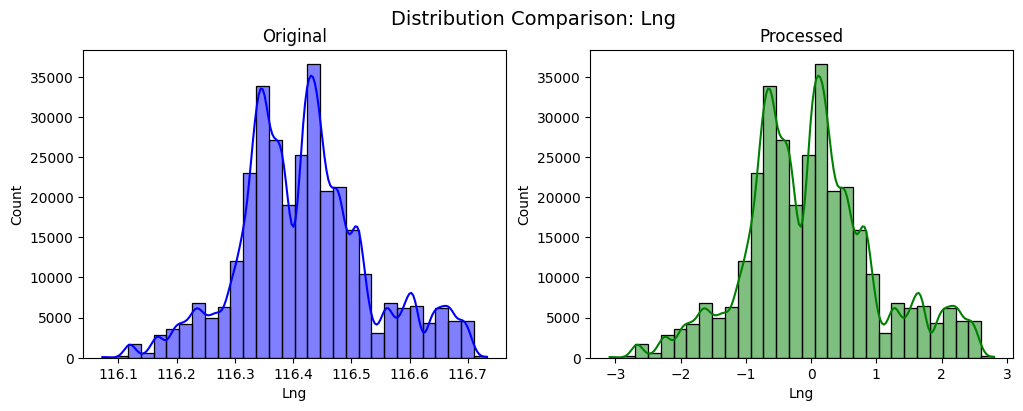

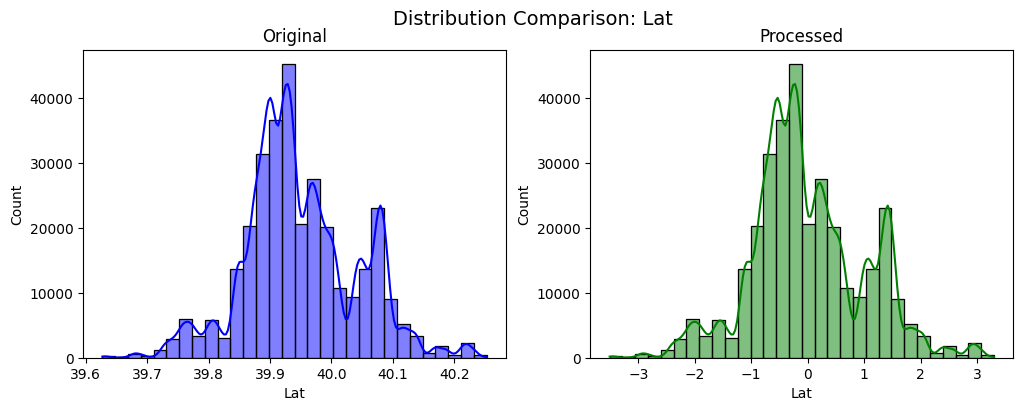

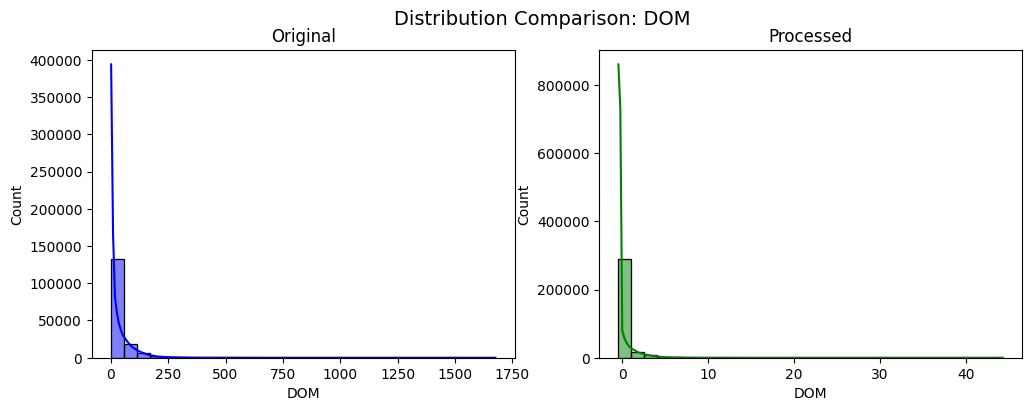

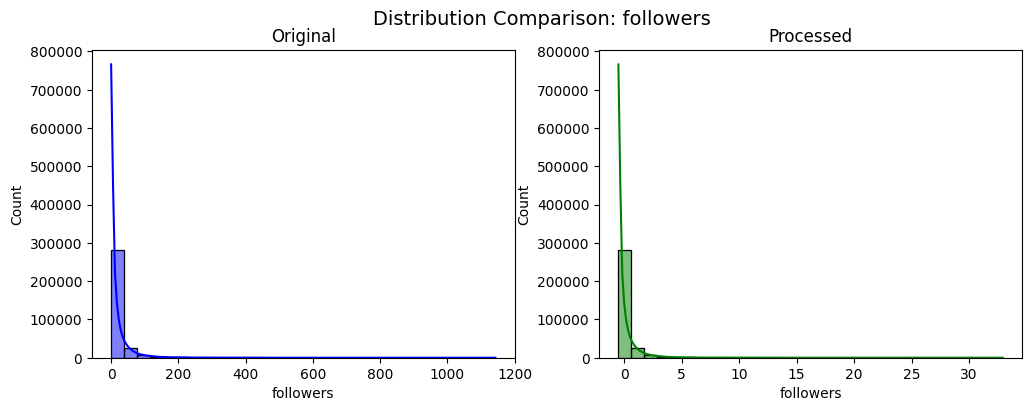

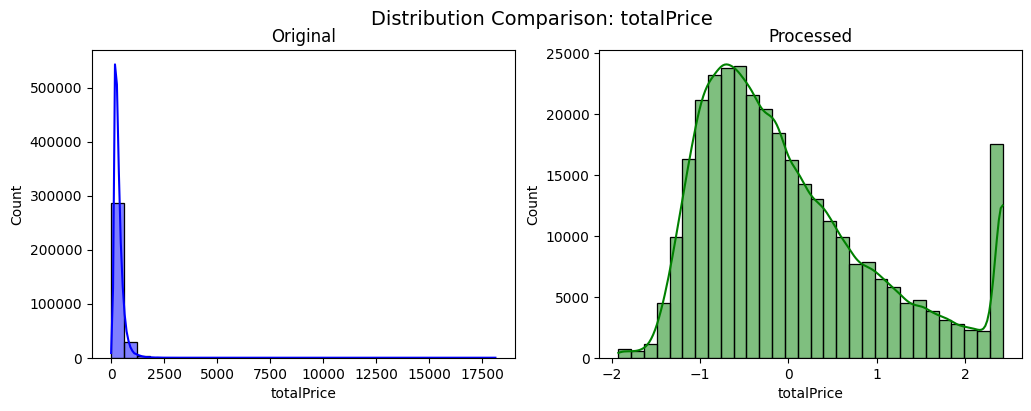

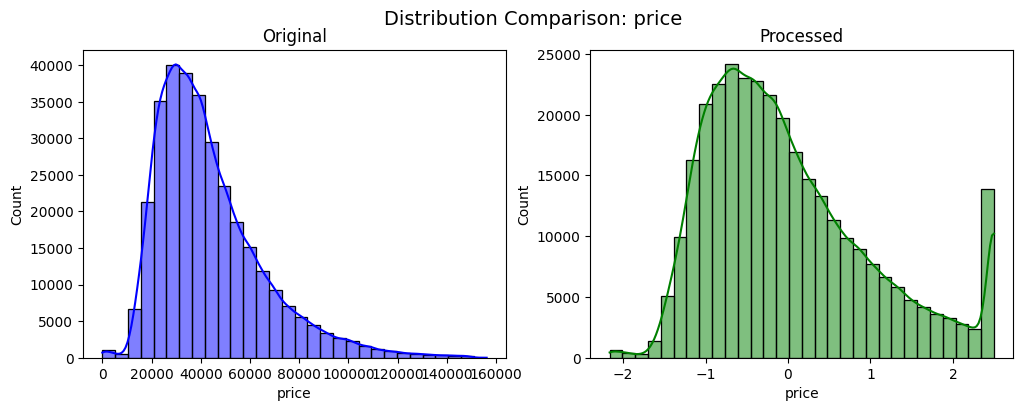

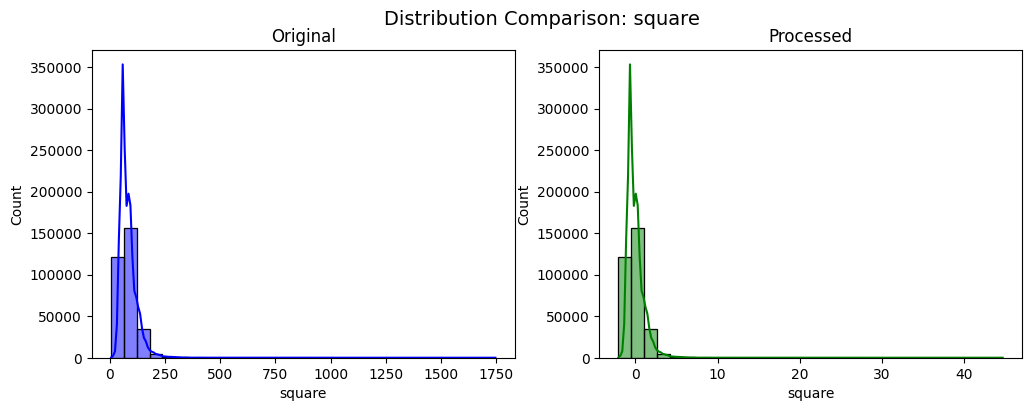

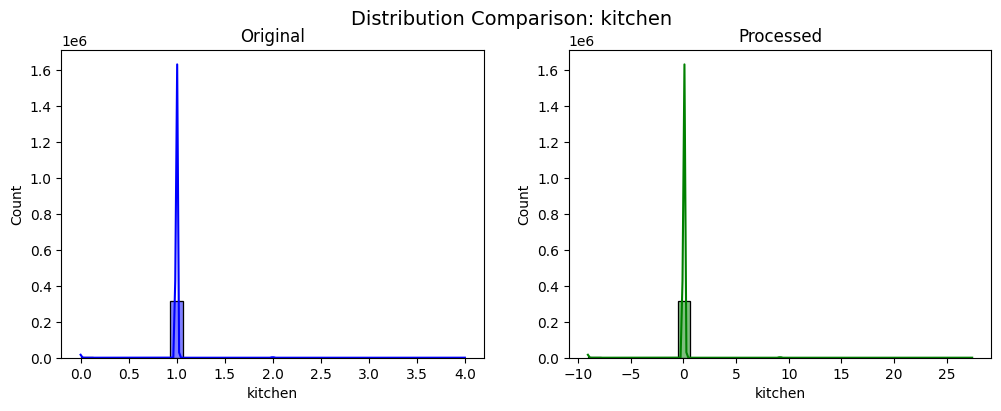

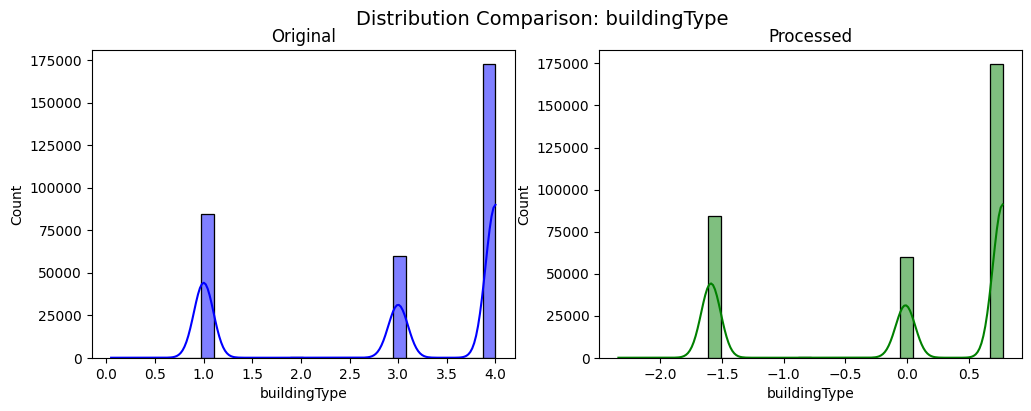

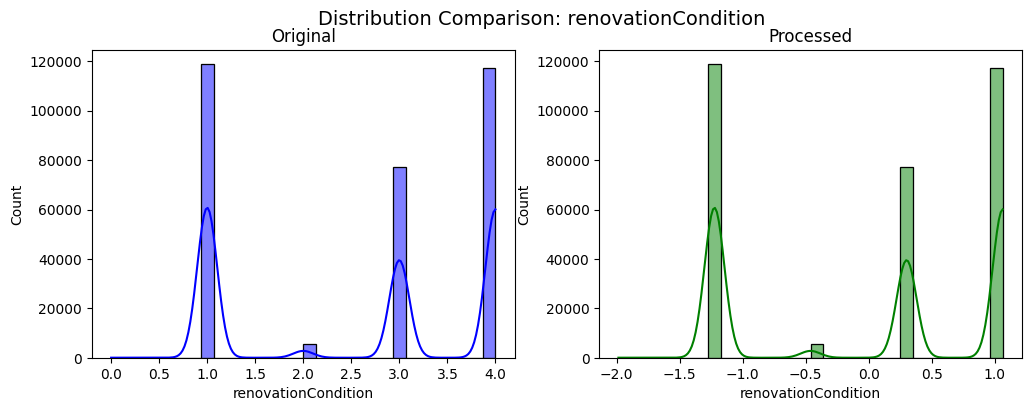

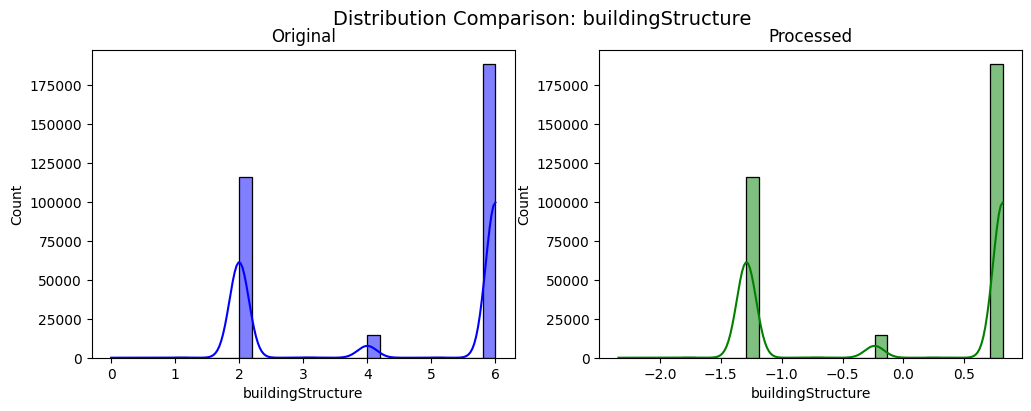

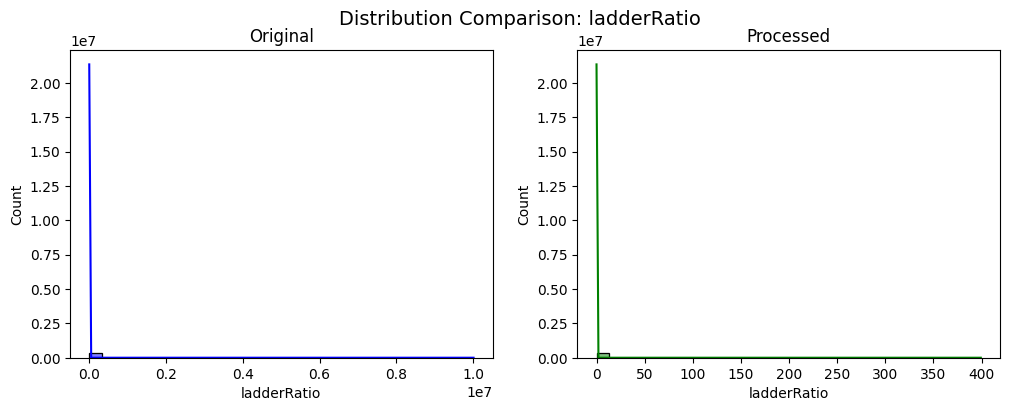

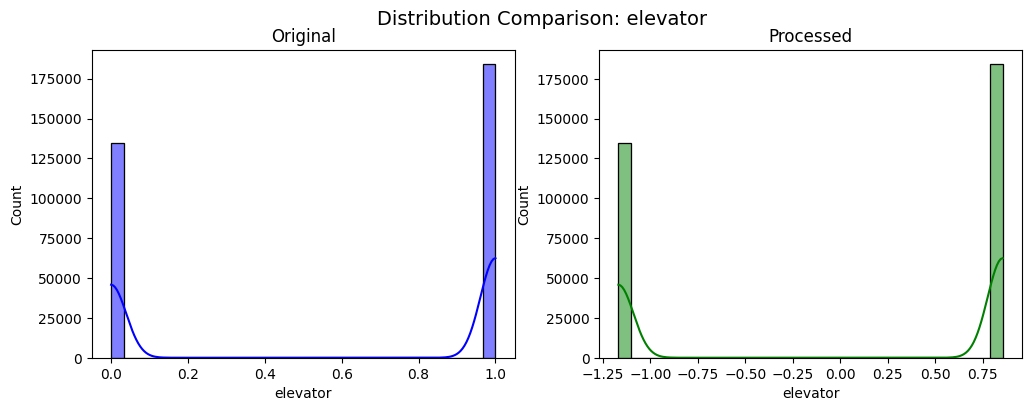

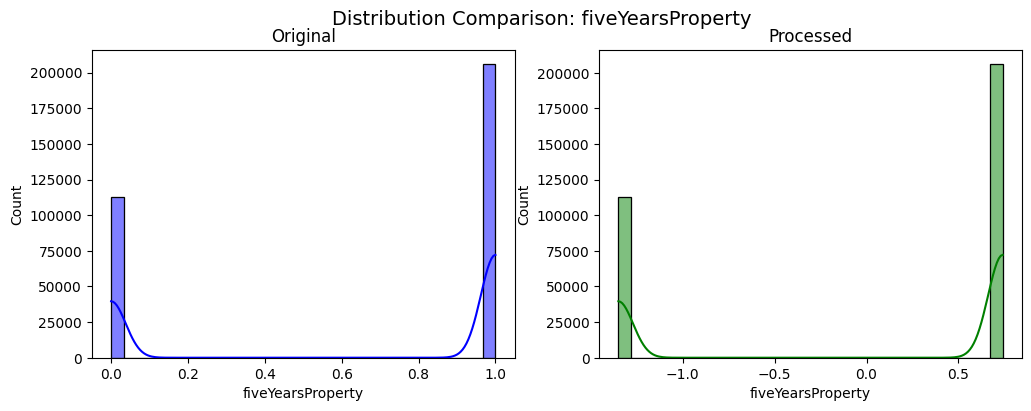

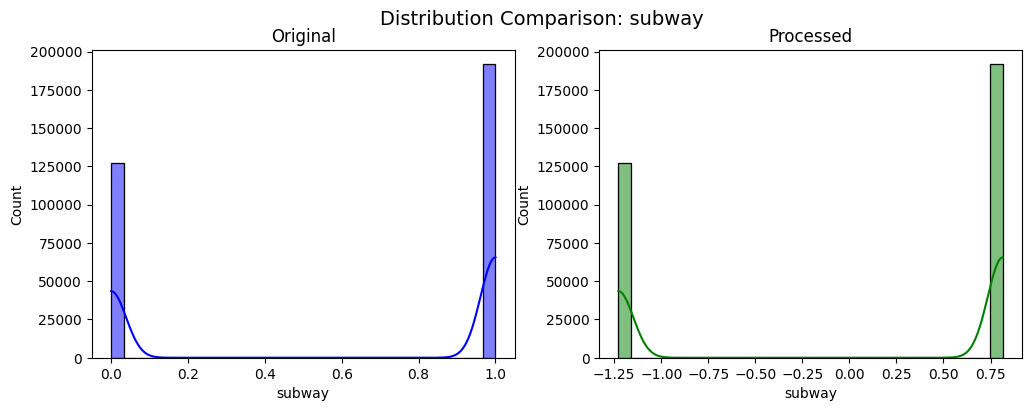

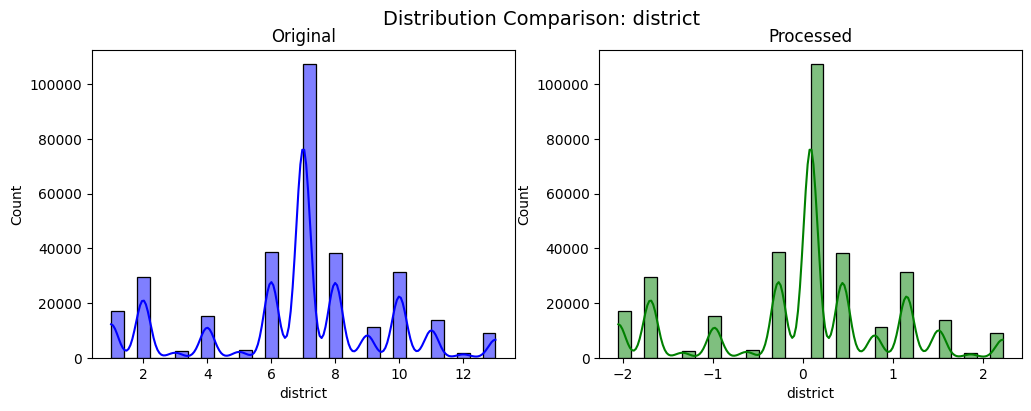

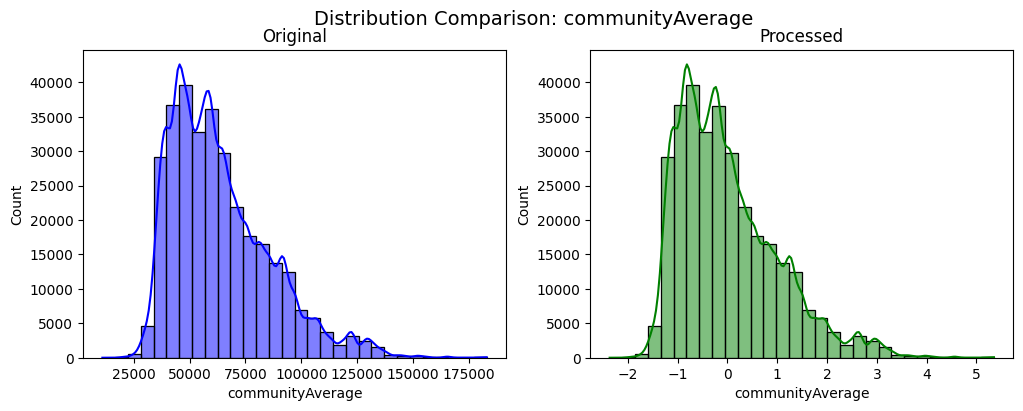

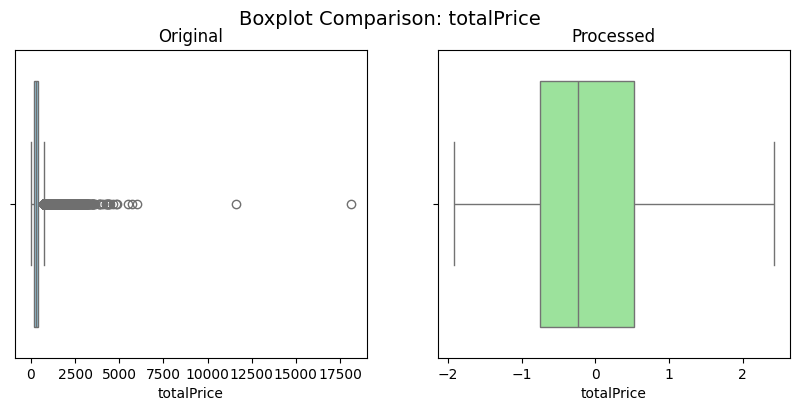

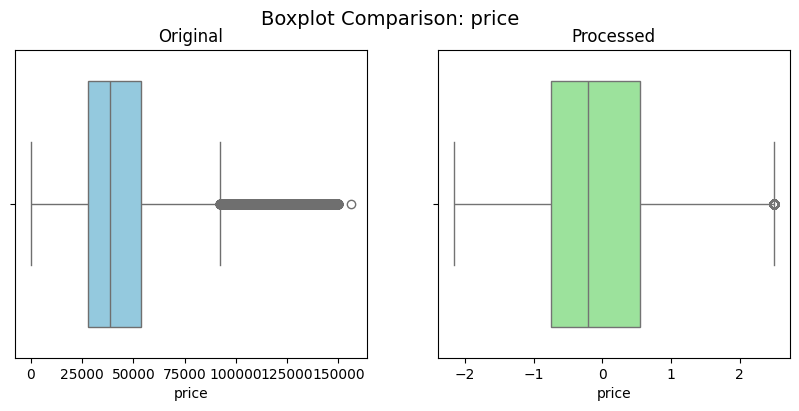

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns present in both datasets
numeric_cols = [col for col in df_original.select_dtypes(include=[np.number]).columns if col in df_processed.columns]

# Statistical summary comparison
summary_original = df_original[numeric_cols].describe().T
summary_processed = df_processed[numeric_cols].describe().T

print("\nStatistical Summary (Original):\n", summary_original)
print("\nStatistical Summary (Processed):\n", summary_processed)

# Plot distribution changes
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribution Comparison: {col}", fontsize=14)
    
    sns.histplot(df_original[col], bins=30, kde=True, ax=axes[0], color="blue")
    axes[0].set_title("Original")
    
    sns.histplot(df_processed[col], bins=30, kde=True, ax=axes[1], color="green")
    axes[1].set_title("Processed")
    
    plt.show()

# Boxplots to visualize outlier capping effect
for col in ['totalPrice', 'price', 'area']:
    if col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f"Boxplot Comparison: {col}", fontsize=14)
        
        sns.boxplot(x=df_original[col], ax=axes[0], color="skyblue")
        axes[0].set_title("Original")
        
        sns.boxplot(x=df_processed[col], ax=axes[1], color="lightgreen")
        axes[1].set_title("Processed")
        
        plt.show()
